In [87]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Lab 2 - Intro to Stan

In [88]:
F = 6 # Gustaw
L = 6 # Cyburt

## Excercise 1

In [89]:
gen_quant = CmdStanModel(stan_file='code_1.stan')
samples = gen_quant.sample(data={'M':F},
                           fixed_param=True,
                           iter_sampling=1000,
                           iter_warmup=0,
                           chains = 1)

18:03:27 - cmdstanpy - INFO - compiling stan file C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_1.stan to exe file C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_1.exe
18:03:48 - cmdstanpy - INFO - compiled model executable: C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_1.exe
18:03:48 - cmdstanpy - WARNING - Stan compiler has produced 2 warnings:
18:03:48 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_1.hpp C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_1.stan
Warning in 'C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_1.stan', line 7, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag 


18:03:49 - cmdstanpy - INFO - CmdStan done processing.


Pandas Dataframe:

In [90]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,0.0,0.0,230.6070,234.0,219.0,225.0,249.0,231.0,248.0
1,0.0,0.0,45.2654,40.0,50.0,58.0,47.0,50.0,44.0
2,0.0,0.0,86.8687,82.0,88.0,89.0,100.0,97.0,95.0
3,0.0,0.0,133.7490,144.0,130.0,137.0,139.0,120.0,135.0
4,0.0,0.0,99.4828,105.0,111.0,89.0,92.0,116.0,101.0
...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,15.5784,18.0,20.0,15.0,16.0,21.0,19.0
996,0.0,0.0,278.2450,276.0,268.0,298.0,281.0,256.0,264.0
997,0.0,0.0,143.8720,134.0,149.0,157.0,149.0,135.0,142.0
998,0.0,0.0,114.9130,146.0,94.0,126.0,110.0,132.0,101.0


y_sim's and lambda histograms:

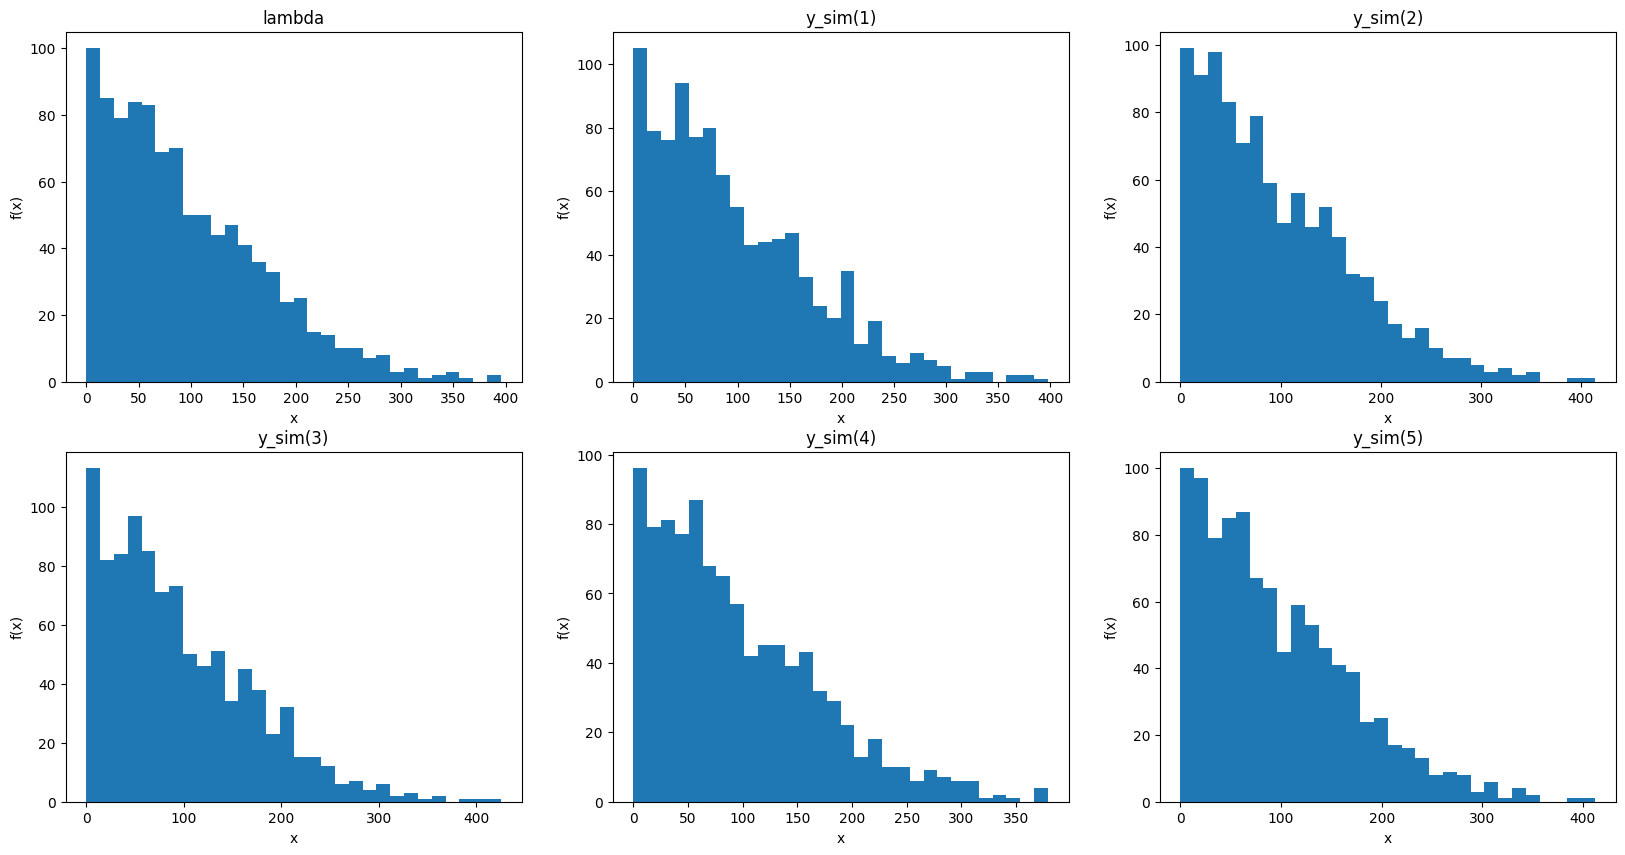

In [91]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()
bins = 30

df["lambda"].plot.hist(bins=bins, ax=ax[0])

ax[0].set_title("lambda")
ax[0].set_xlabel("x"), ax[0].set_ylabel("f(x)")

for i in range(1, 6):
   df[f"y_sim[{i}]"].plot.hist(bins=bins, ax=ax[i])
   ax[i].set_title(f"y_sim({i})")
   ax[i].set_xlabel("x"), ax[i].set_ylabel("f(x)")

plt.show()

## Excercise 2

In [92]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

18:03:50 - cmdstanpy - INFO - compiling stan file C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_2.stan to exe file C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_2.exe
18:04:10 - cmdstanpy - INFO - compiled model executable: C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_2.exe
18:04:10 - cmdstanpy - WARNING - Stan compiler has produced 1 warnings:
18:04:10 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_2.hpp C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_2.stan
Warning in 'C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_2.stan', line 3, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag 


18:04:11 - cmdstanpy - INFO - CmdStan done processing.


18:04:11 - cmdstanpy - INFO - compiling stan file C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_3.stan to exe file C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_3.exe
18:04:30 - cmdstanpy - INFO - compiled model executable: C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_3.exe
18:04:30 - cmdstanpy - WARNING - Stan compiler has produced 1 warnings:
18:04:30 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_3.hpp C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_3.stan
Warning in 'C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_3.stan', line 3, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag 


18:04:31 - cmdstanpy - INFO - CmdStan done processing.


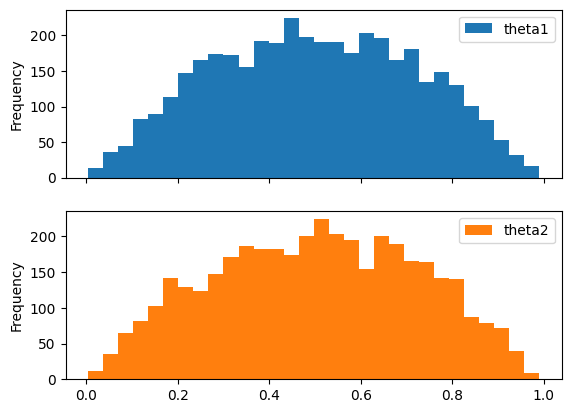

In [93]:
t1 = samp_bern1.stan_variable('theta')
t2 = samp_bern2.stan_variable('theta')

df = pd.DataFrame({'theta1': t1, 'theta2': t2})
df.plot.hist(subplots=True, bins=30)
plt.show()

I don't see significant change.

## Excercise 3

Unconstrained parameters

In [ ]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples', iter_sampling=6000, iter_warmup=1000, seed=24072000)


There were many errors like those below:

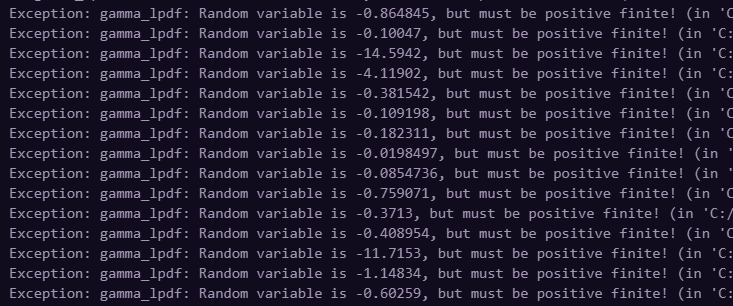

CmdStanMCMC: model=code_4 chains=4['method=sample', 'num_samples=6000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713181234_1.csv
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713181234_2.csv
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713181234_3.csv
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713181234_4.csv
 output_files:
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713181234_0-stdout.txt
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713181234_1-stdout.txt
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713181234_2-stdout.txt
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713181234_3-stdout.txt


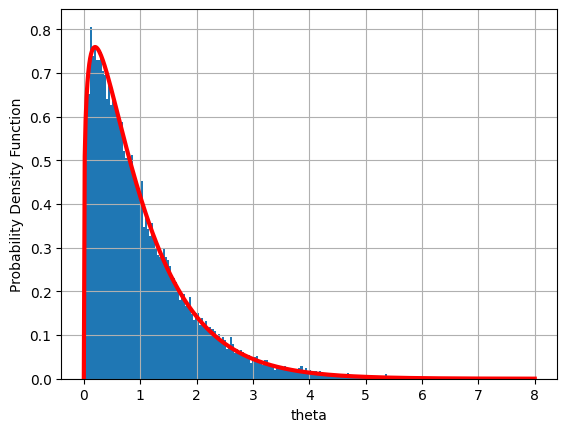

In [101]:
out_gamma1.diagnose()
print(out_gamma1)

N=500

xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale=1 / 1.25)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.plot(xs, pdfs, linewidth=3, color='r')

df = out_gamma1.draws_pd()
df["theta"].hist(bins=200, density=True)

plt.show()

There are warnings that theta is negative (< 0).

Constrained parameter

18:04:53 - cmdstanpy - INFO - compiling stan file C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_5.stan to exe file C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_5.exe
18:05:12 - cmdstanpy - INFO - compiled model executable: C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_5.exe
18:05:13 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████▏     | 00:00 Iteration: 2700 / 7000 [ 38%]  (Sampling)


chain 1 |██████▌   | 00:00 Iteration: 4400 / 7000 [ 62%]  (Sampling)


chain 1 |████████▊ | 00:00 Iteration: 6000 / 7000 [ 85%]  (Sampling)








chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


18:05:14 - cmdstanpy - INFO - CmdStan done processing.
18:05:14 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_5.stan', line 6, column 3 to column 29)
Consider re-running with show_console=True if the above output is unclear!



CmdStanMCMC: model=code_5 chains=4['method=sample', 'num_samples=6000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713180513_1.csv
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713180513_2.csv
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713180513_3.csv
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713180513_4.csv
 output_files:
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713180513_0-stdout.txt
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713180513_1-stdout.txt
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713180513_2-stdout.txt
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713180513_3-stdout.txt


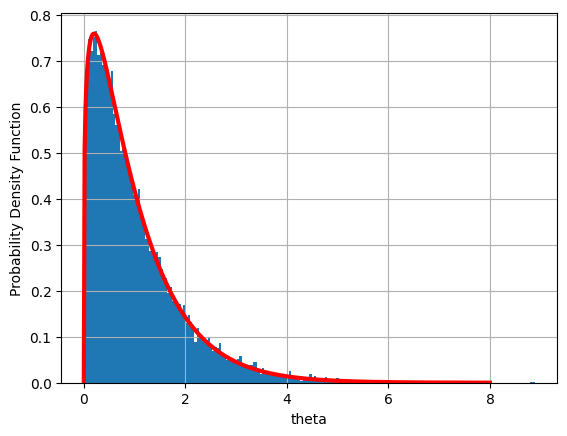

In [95]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=24072000)
out_gamma2.diagnose()
print(out_gamma2)

N=500

xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale=1 / 1.25)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.plot(xs, pdfs, linewidth=3, color='r')

df = out_gamma2.draws_pd()
df["theta"].hist(bins=200, density=True)

plt.show()

Log is free from warnings that ocurred above.

## Excercise 4

In [96]:
model_tune = CmdStanModel(stan_file='code_6.stan')

y0 = 0.75

data={'y_guess':[y0], 'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

18:05:15 - cmdstanpy - INFO - compiling stan file C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_6.stan to exe file C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_6.exe
18:05:43 - cmdstanpy - INFO - compiled model executable: C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_6.exe
18:05:43 - cmdstanpy - WARNING - Stan compiler has produced 5 warnings:
18:05:43 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_6.hpp C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_6.stan
Warning in 'C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_6.stan', line 2, column 45: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.33.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc


18:05:44 - cmdstanpy - INFO - CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.32935


Standard deviation is around 2.33.

## Excercise 5

18:05:44 - cmdstanpy - INFO - compiling stan file C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_7.stan to exe file C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_7.exe
18:06:05 - cmdstanpy - INFO - compiled model executable: C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_7.exe
18:06:05 - cmdstanpy - WARNING - Stan compiler has produced 1 warnings:
18:06:05 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_7.hpp C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_7.stan
Warning in 'C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_7.stan', line 6, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag 


18:06:45 - cmdstanpy - INFO - CmdStan done processing.


18:06:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


18:06:46 - cmdstanpy - INFO - CmdStan done processing.


18:06:47 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


18:06:48 - cmdstanpy - INFO - CmdStan done processing.


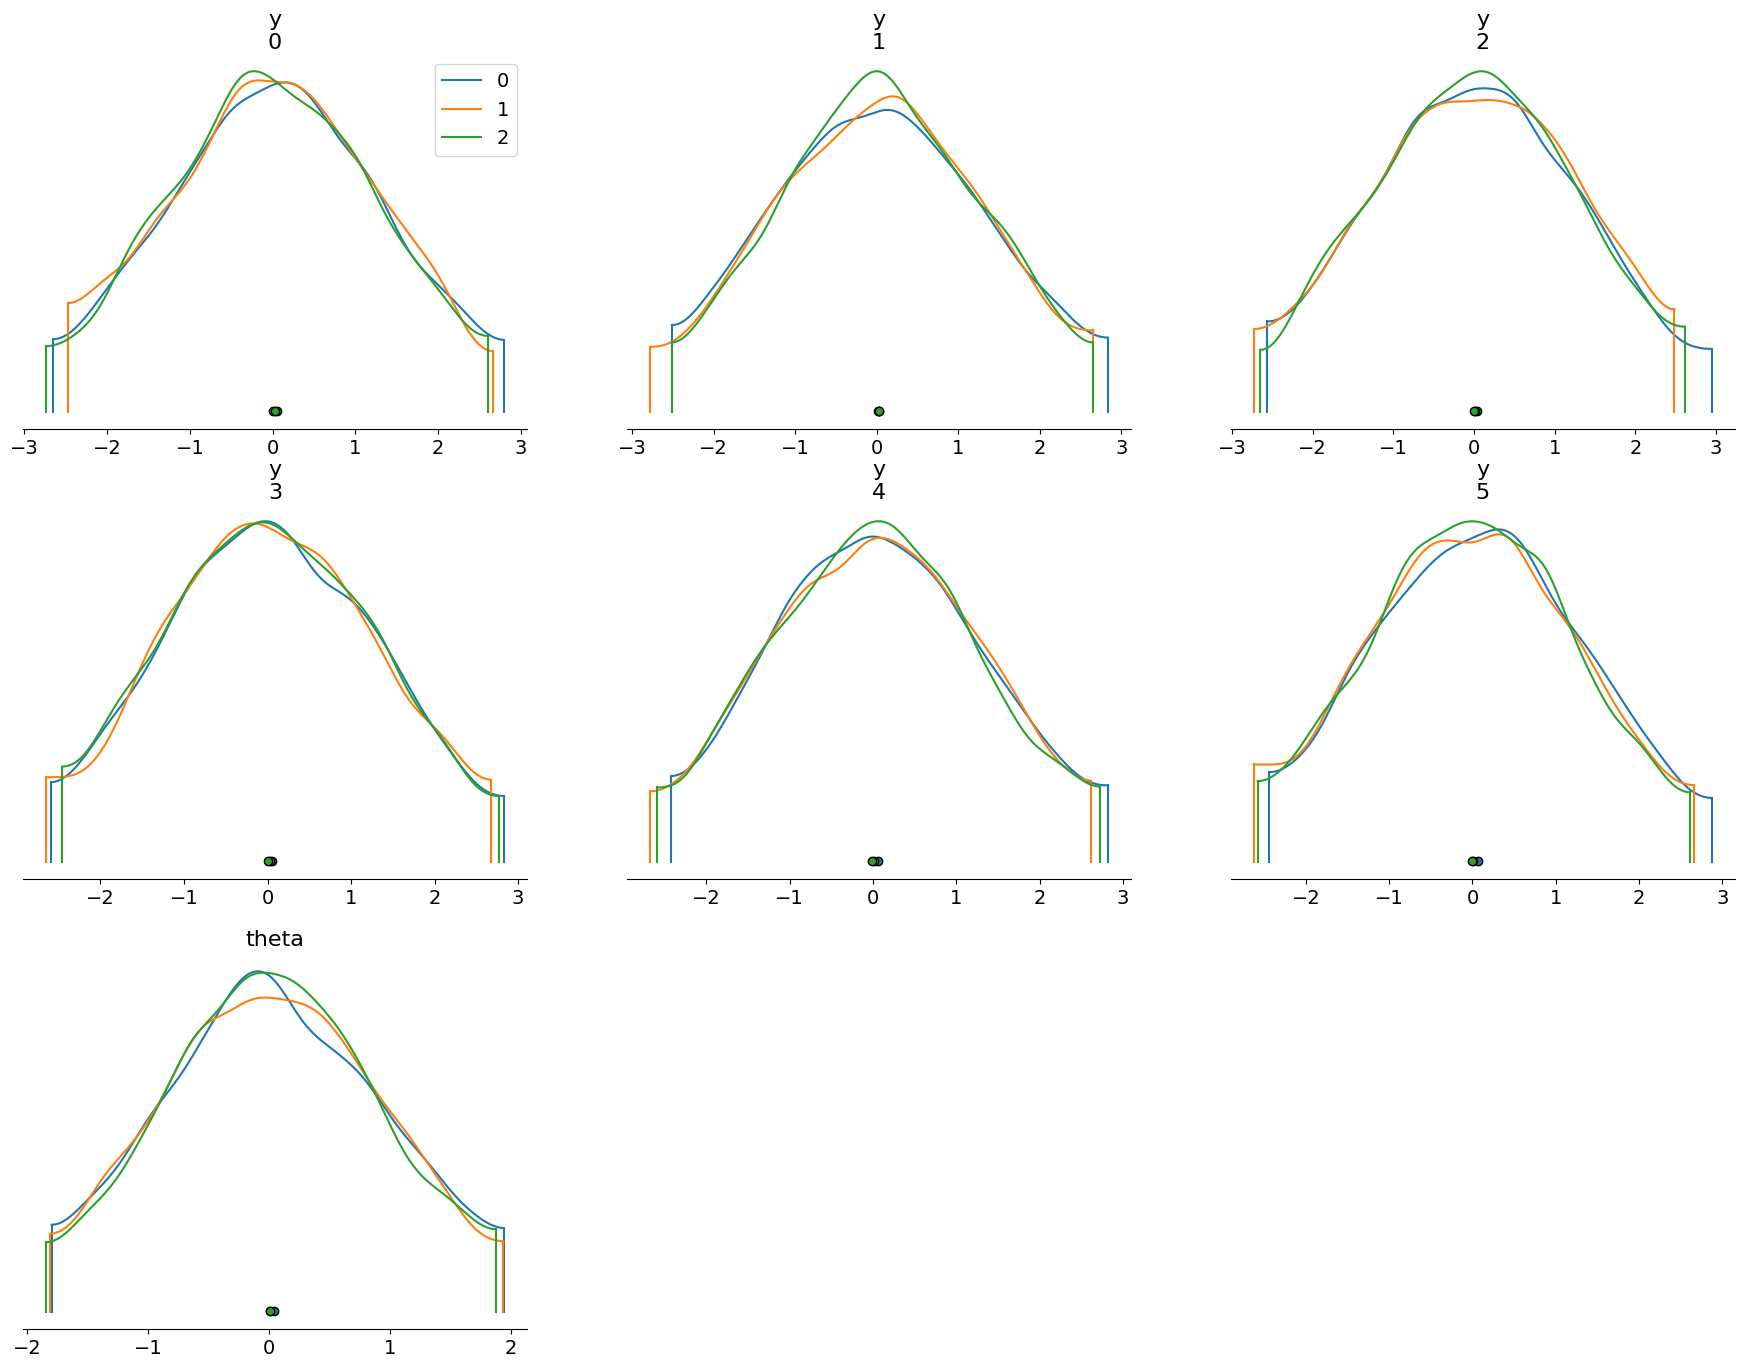

In [97]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 24072000
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6

18:06:48 - cmdstanpy - INFO - compiling stan file C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_10.stan to exe file C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_10.exe
18:07:09 - cmdstanpy - INFO - compiled model executable: C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\code_10.exe
18:07:09 - cmdstanpy - WARNING - Stan compiler has produced 1 warnings:
18:07:09 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_10.hpp C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_10.stan
Warning in 'C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_10.stan', line 6, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format

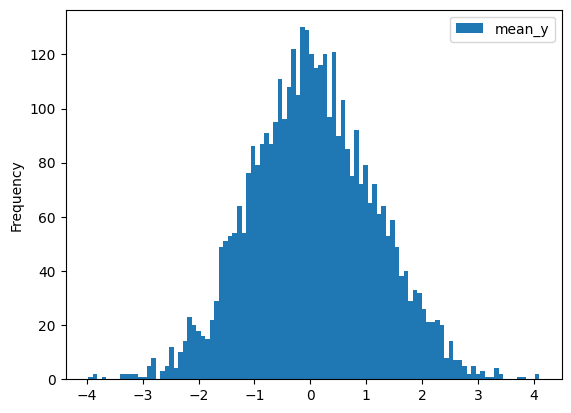

In [98]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data, mcmc_sample = result_1)
# investigate the output and plot histogram of mean_y variable
hist_df=mean_of_y.draws_pd()
hist_df.plot.hist(bins=100)
plt.show()